In [1]:
#Liabraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

plt.style.use('fivethirtyeight')

In [2]:
df = yf.download(tickers='AAPL', start='2019-1-1', end='2022-11-11', interval='1d')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.105129,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.309586,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.774231,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.694611,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.375053,164101200
...,...,...,...,...,...,...
2022-11-04,142.089996,142.669998,134.380005,138.380005,138.380005,140716700
2022-11-07,137.110001,139.149994,135.669998,138.919998,138.919998,83374600
2022-11-08,140.410004,141.429993,137.490005,139.500000,139.500000,89908500


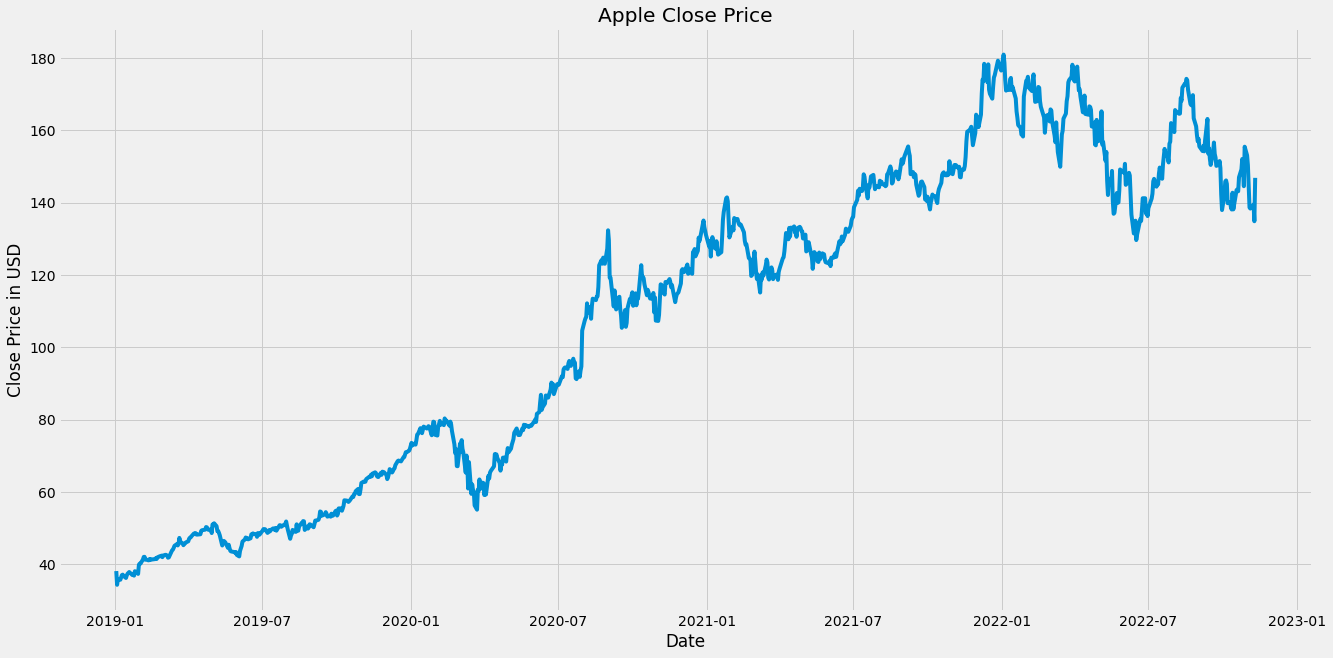

In [3]:
plt.figure(figsize=(20,10))
plt.title('Apple Close Price')
plt.plot(df['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.show()

In [4]:
def moving_average(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

In [5]:
df['SMA_30'] = moving_average(df)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_30
Date,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.105129,148158800,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.309586,365248800,NaN
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.774231,234428400,NaN
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.694611,219111200,NaN
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.375053,164101200,NaN
...,...,...,...,...,...,...,...
2022-11-04,142.089996,142.669998,134.380005,138.380005,138.380005,140716700,145.042333
2022-11-07,137.110001,139.149994,135.669998,138.919998,138.919998,83374600,144.647333
2022-11-08,140.410004,141.429993,137.490005,139.500000,139.500000,89908500,144.238666


In [7]:
def strategy(df):
    buy = []
    sell = []
    flag = 0
    buy_price = 0
    sell_price = 0
    
    for i in range(len(df)):
        
        if df['SMA_30'][i] > df['Close'][i] and flag == 0:
            buy.append(df['Close'][i])
            sell.append(np.nan)
            buy_price = df['Close'][i]
            flag = 1
        elif df['SMA_30'][i] < df['Close'][i] and flag == 1 and buy_price < df['Close'][i]:
            sell.append(df['Close'][i])
            buy.append(np.nan)
            sell_price = df['Close'][i]
            buy_price = 0
            flag = 0
        else:
            sell.append(np.nan)
            buy.append(np.nan)
    
    return (buy, sell)

In [8]:
# strat = strategy(df)

df['Buy'] = strategy(df)[0]
df['Sell'] = strategy(df)[1]

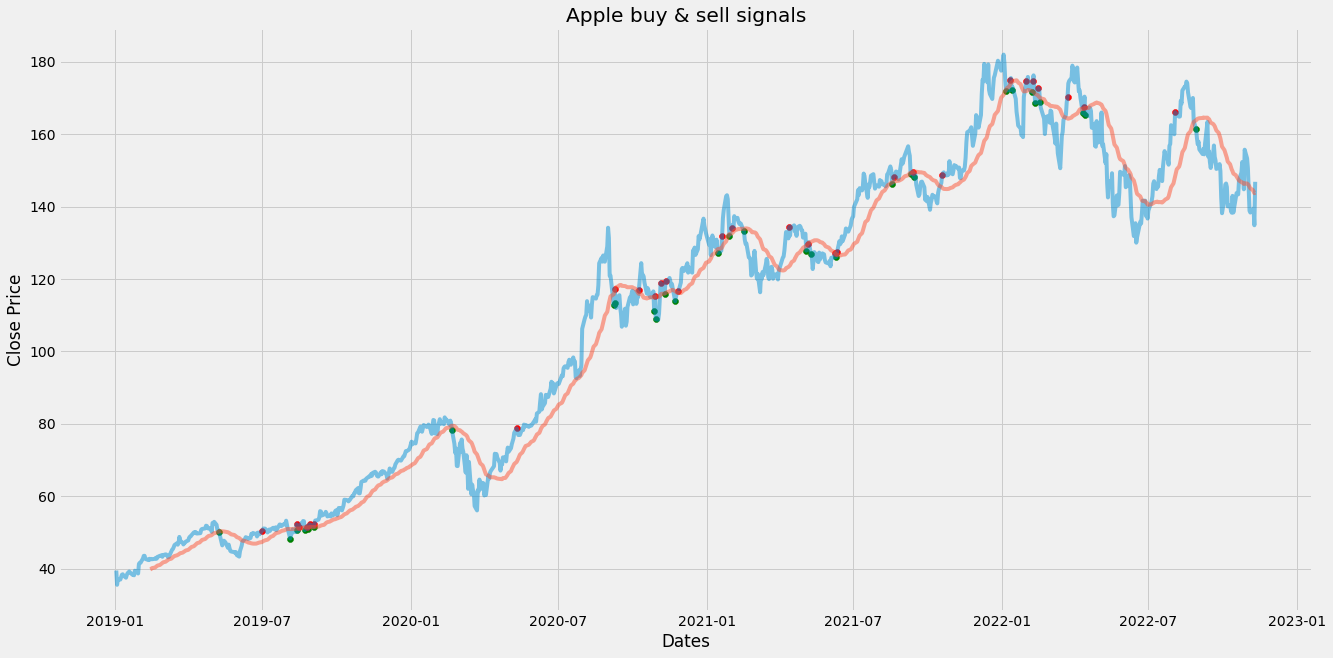

In [9]:
plt.figure(figsize=(20,10))
plt.title('Apple buy & sell signals')
plt.plot(df['Close'], alpha = 0.5, label='CLose')
plt.plot(df['SMA_30'], alpha=0.5, label='SMA_30')
plt.scatter(df.index, df['Buy'], color='green', label='Buy Signal', alpha= 1)
plt.scatter(df.index, df['Sell'], color = 'red', label = 'Sell Signal', alpha = 1)
plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.show()